In [48]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare

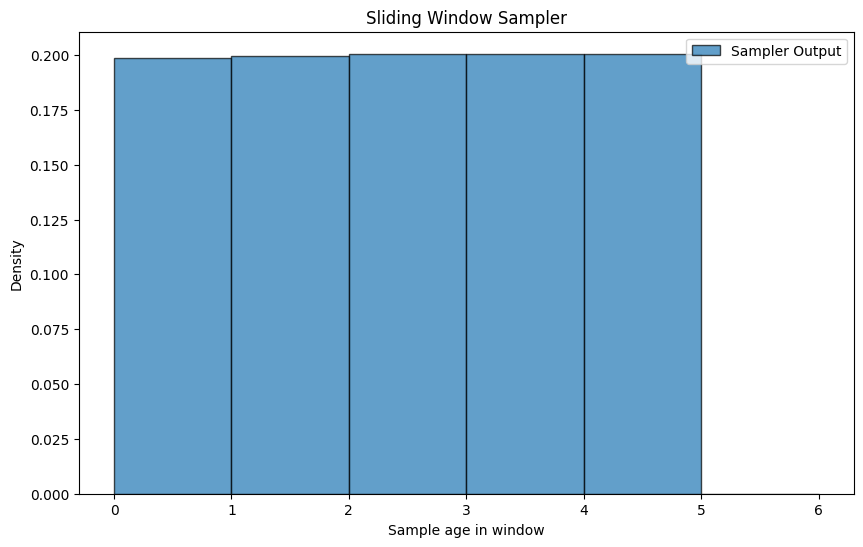

In [49]:
experiment_results_global_indices = []
experiment_results_samples = []

with open("zad26.txt", "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            global_index, local_index, sample_timestamp = map(int, parts)
            experiment_results_global_indices.append(global_index)
            experiment_results_samples.append(sample_timestamp)

loc_indices = [g - s for g, s in zip(experiment_results_global_indices, experiment_results_samples)]
window_size = max(loc_indices) + 1

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(loc_indices, bins=range(window_size + 2), density=True, alpha=0.7, edgecolor='black', label='Sampler Output')
ax.set_xlabel('Sample age in window')
ax.set_ylabel('Density')
ax.set_title('Sliding Window Sampler')
ax.legend()
plt.show()

In [50]:
from scipy.stats import chi2

obs_idx_counts = [0] * window_size
for idx in loc_indices:
    obs_idx_counts[idx] += 1
exp_idx_counts = [len(loc_indices) / window_size] * window_size

chi2_stat, p_val = chisquare(obs_idx_counts, exp_idx_counts)
critical_val = chi2.ppf(1 - 0.05, window_size - 1)

print(f"Chi^2 Test for Uniformity:")
print(f"- Degrees of freedom: {window_size - 1}")
print(f"- Chi² statistic:     {chi2_stat:.4f}")
print(f"- Critical value:     {critical_val:.4f} (alpha=0.05)")
print(f"- p-value:            {p_val:.4f}")

if chi2_stat < critical_val:
    print(f"Result: No grounds for H0 rejection -> distribution is uniform")
else:
    print(f"Result: Rejecting H0 -> distribution is not uniform (alpha=0.05)")

Chi^2 Test for Uniformity:
- Degrees of freedom: 4
- Chi² statistic:     0.0400
- Critical value:     9.4877 (alpha=0.05)
- p-value:            0.9998
Result: No grounds for H0 rejection -> distribution is uniform
